<a href="https://colab.research.google.com/github/Lonks117/Linear-transformations-images/blob/main/Transformations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Transformations

Santiago Urzúa Saldívar A01638687

Citación de páginas que sirvieron como apoyo
https://gautamnagrawal.medium.com/rotating-image-by-any-angle-shear-transformation-using-only-numpy-d28d16eb5076 


https://shrishailsgajbhar.github.io/post/Image-Processing-Image-Rotation-Without-Library-Functions 


https://medium.com/@bosssds65/translation-image-using-translation-matrix-with-python-d5d2b580d963 



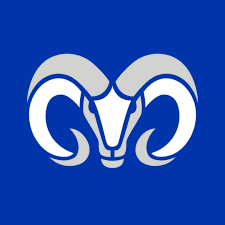

In [6]:
#Cargamos las librerias necesarias y cargamos la imagen
import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('logo.png')

cv2_imshow(img)

Procedemos a hacer nuestras funciones de rotación en donde específicamos puntos importantes como el punto medio y la matriz de rotación

In [7]:
def rMatrix(deg):
  theta = deg/180*np.pi
  Matrix = np.array([[np.cos(theta), -np.sin(theta)],[np.sin(theta), np.cos(theta)]])
  return Matrix

In [8]:
def rotate(img, deg):
  height, width, chns = img.shape
  centery, centerx = height//2, width//2
  
  aux = np.array([[-centerx, centerx, centerx],[centery, centery, -centery]])
  halfrw, halfrh = np.max(np.abs(rMatrix(deg) @ aux), axis=1)

  rotatedw, rotatedh = halfrw*2, halfrh*2
  rotatedw, rotatedh = int(rotatedw), int(rotatedh)

  rotatedimg = np.zeros((rotatedh, rotatedw, 3))

  yrotate, xrotate = np.indices((rotatedh, rotatedw))
  yrotate, xrotate = yrotate.flatten(), xrotate.flatten()
  yrcenter, xrcenter = yrotate-halfrh, xrotate-halfrw

  xc, yc = (rMatrix(-deg) @ np.row_stack((xrcenter, yrcenter))).astype(np.int32)
  x, y = xc + centerx, yc + centery
  include = np.logical_and(np.abs(xc)<centerx, np.abs(yc)<centery)

  rotatedimg[rotatedh-1-yrotate[include], xrotate[include]] = img[height-1-y[include], x[include]]
  return rotatedimg

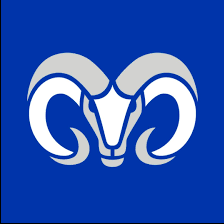

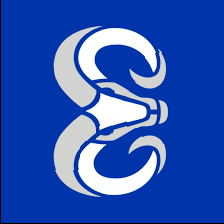

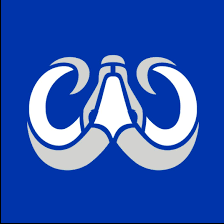

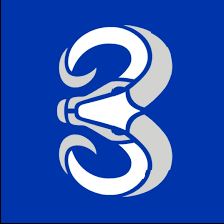

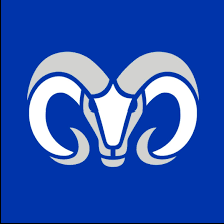

In [10]:
#Rotation
degrees = (0,90,180,270,360)
for deg in degrees:
    rotimg = rotate(img, deg)
    cv2_imshow(rotimg)

#FLIPS

In [15]:
def flipX(img):
    T = np.array([[1,0,0],[0,-1,0],[0,0,1]])
    flipped = flip(img, T)

In [18]:
def flipY(img):
    T = np.array([[-1,0,0],[0,1,0],[0,0,1]])
    # print(yflipMatrix)
    flipped = flip(img, T)

In [19]:
def flipXY(img):
    T = np.array([[-1,0,0],[0,1,0],[0,0,1]]) @ np.array([[1,0,0],[0,-1,0],[0,0,1]])
    # print(xyflipMatrix)
    flipped = flip(img, T)

In [14]:
def flip(img, T):
    fImg = np.zeros(img.shape, dtype=np.uint8)
    for i, row in enumerate(img):
        for j, col in enumerate(row):
            pixel_data = img[i, j, :]
            input_coords = np.array([i, j, 1])
            newx, newy, _ = np.floor(T @ input_coords).astype(int)
            if((newx != fImg.shape[0]) & (newy != fImg.shape[1])):
                fImg[newx, newy, :] = pixel_data 
    cv2_imshow(fImg)
    return fImg

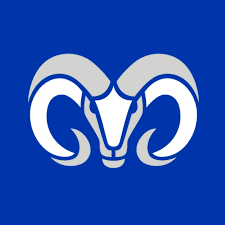

In [16]:
flipX(img)

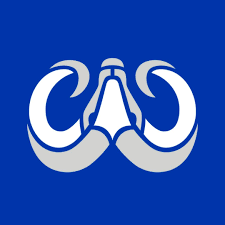

In [20]:
flipY(img)

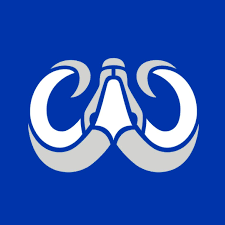

In [21]:
flipXY(img)

Ahora vamos a hacer una traslación

In [22]:
def tMatrix(tx, ty):
  Matrix = np.array([[1, 0, tx],[0, 1, ty]])
  return Matrix

In [30]:
def traslacion(img, tx, ty):
    height, width = img.shape[:2]
    M = tMatrix(tx, ty)
    
    imgtr = np.zeros(img.shape,dtype='u1')
    
    for i in range(height):
        for j in range(width):
            originx = j
            originy = i
            originxy = np.array([originx,originy,1])
            
            newxy = np.dot(M,originxy)
            newx = newxy[0]
            newy = newxy[1]

            if 0 < newx < width and 0 < newy < height:
                imgtr[newy,newx] = img[i,j]
    return imgtr

Corremos los valores de la traslación

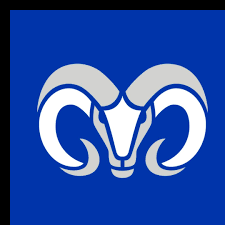

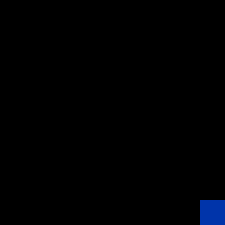

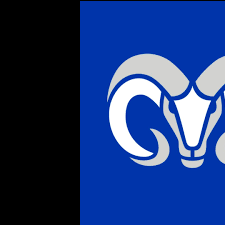

In [41]:
traslaciones = ((10,10),(200,200),(80,0))
for tf in traslaciones:
    tx = tf[0]
    ty = tf[1]
    trimg = traslacion(img, tx, ty)
    cv2_imshow(trimg)

#Escalado

In [50]:
def sMatrix(ex, ey):
  Matrix = np.array([[ex, 0, 0],[0, ey, 0]])
  return Matrix

In [51]:
def escalado(img, ex, ey):
  height, width, chns = img.shape
  centery, centerx = height//2, width//2

  M = sMatrix(ex, ey)
    
  escimg = np.zeros(img.shape, dtype='u1')
  
  for i in range(height):
      for j in range(width):
          originx = j
          originy = i
          originxy = np.array([originx,originy,1])
          
          newxy = np.dot(M,originxy)
          newx = int(newxy[0])
          newy = int(newxy[1])

          escimg[newy,newx] = img[i,j]
  return escimg